In [6]:
# import tensorflow numpy pandas and matplotlib
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2.16.1


In [7]:
# load cover_data.csv
data = pd.read_csv('cover_data.csv')

Shape of the DataFrame:
(581012, 55)

First few rows of the DataFrame:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            22

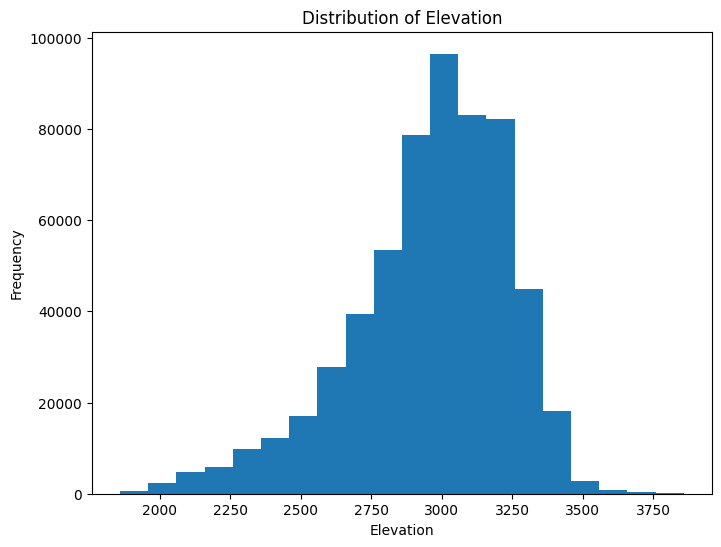

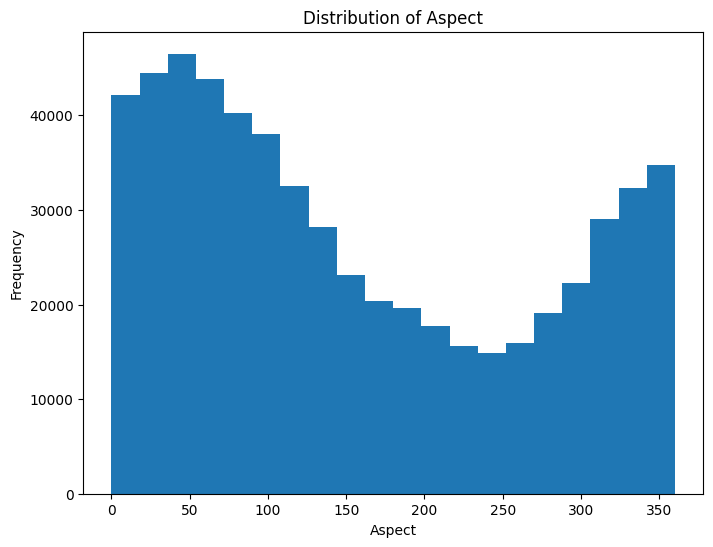

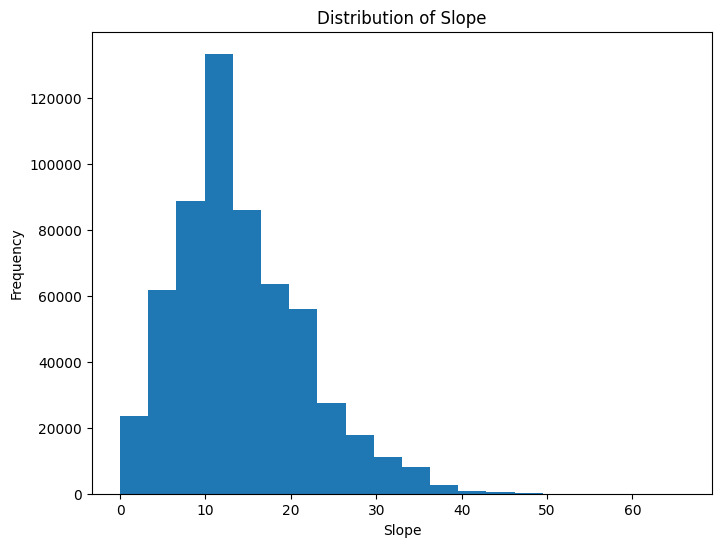

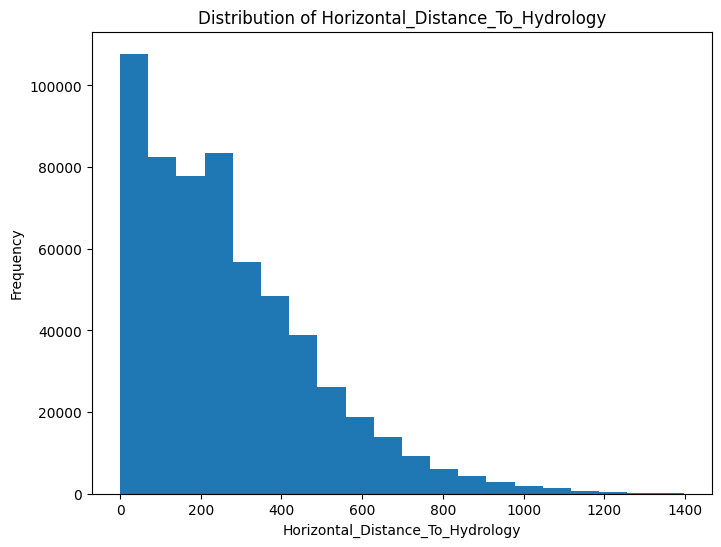

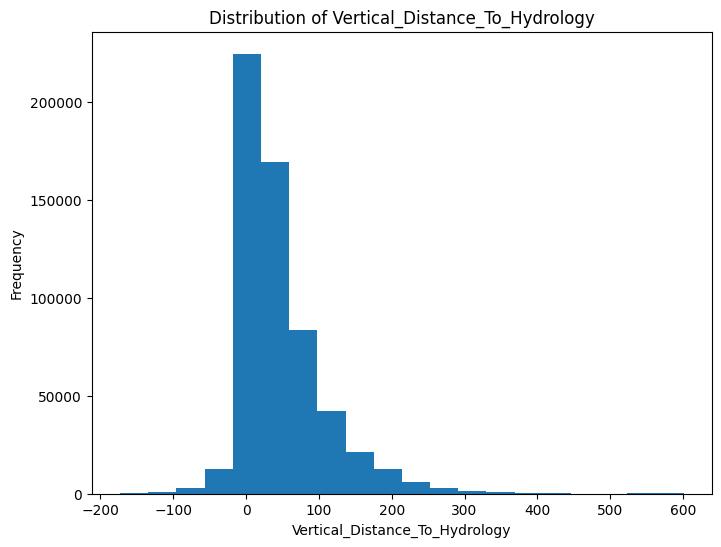

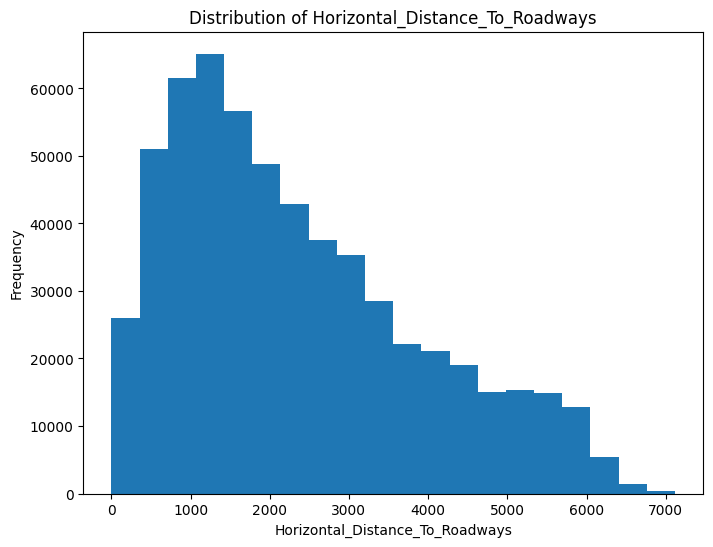

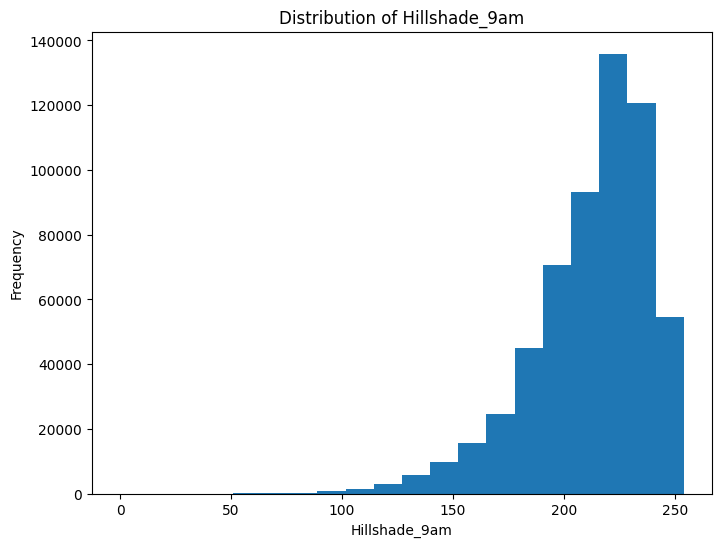

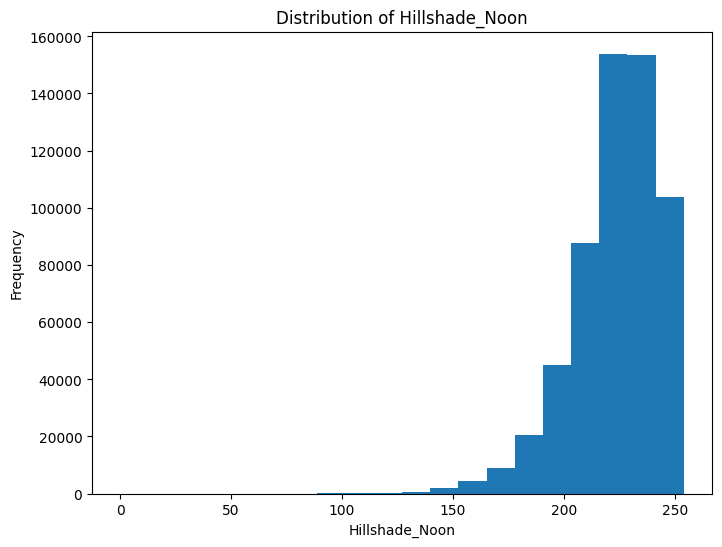

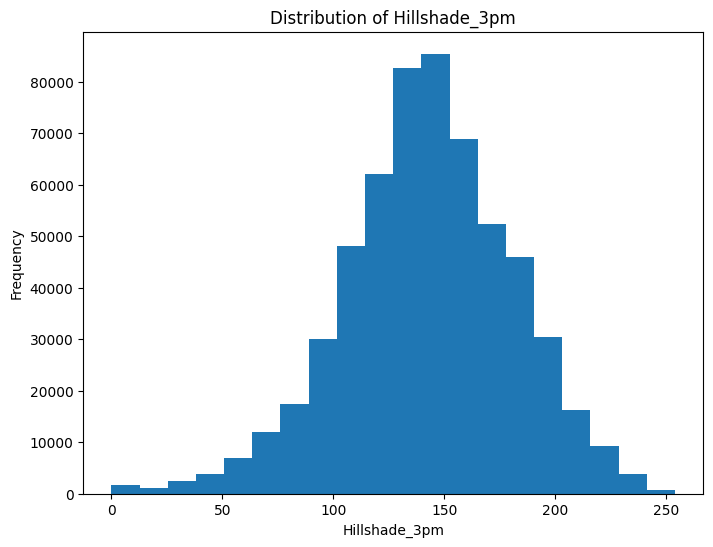

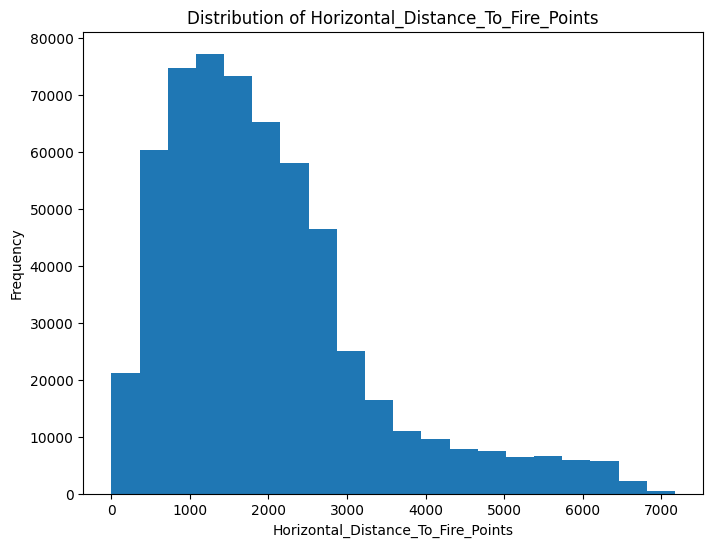

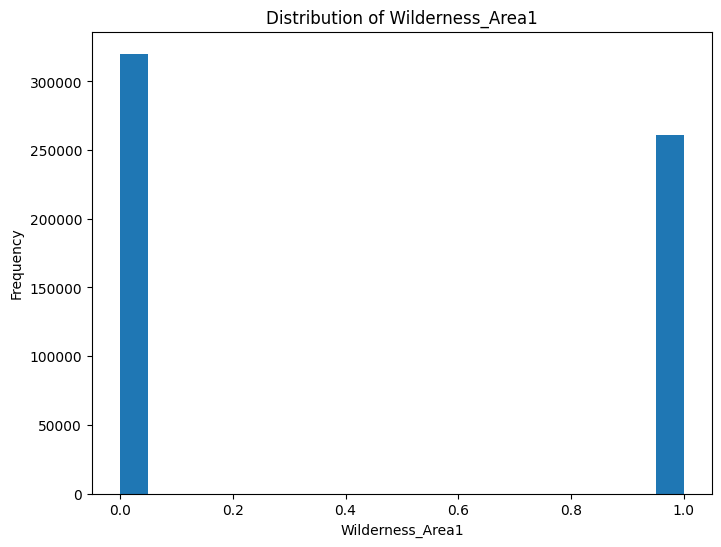

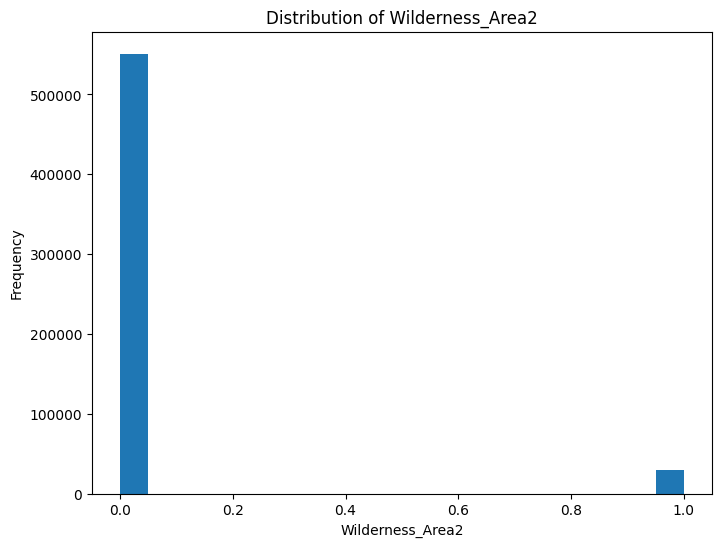

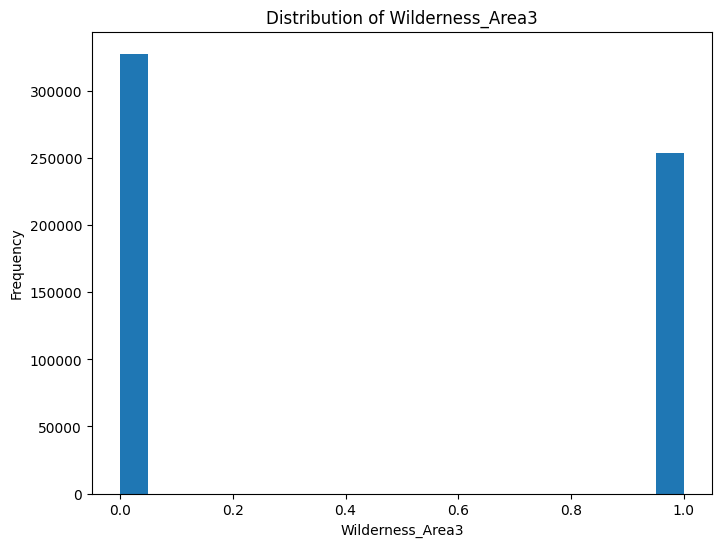

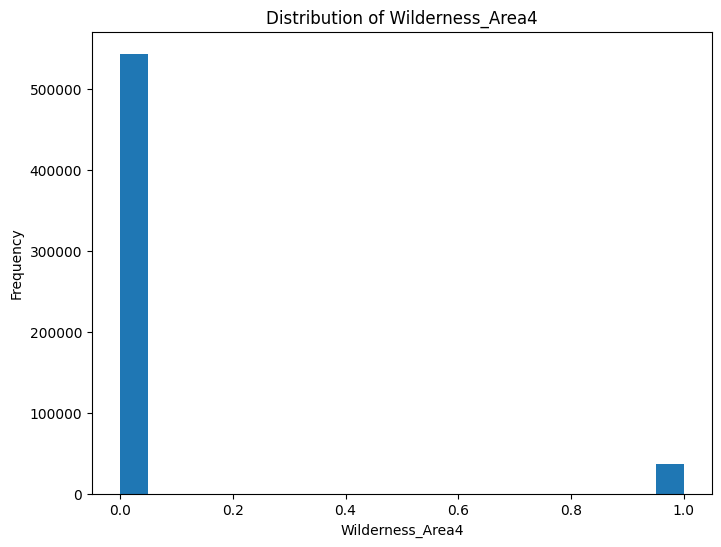

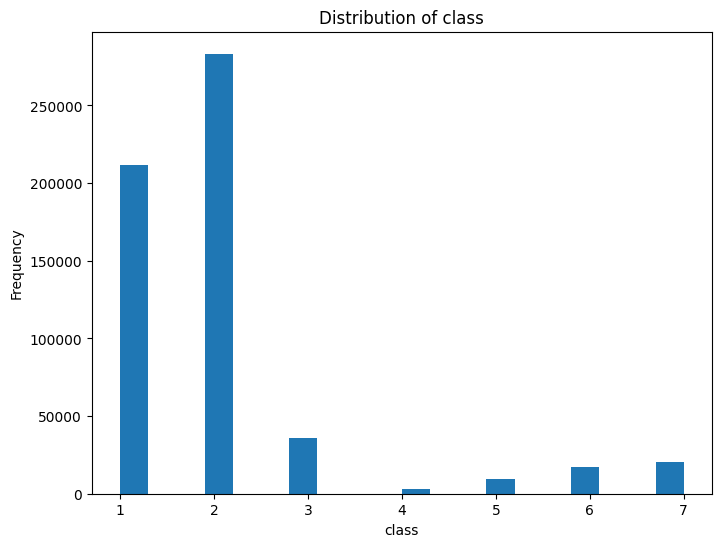

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:")
print(data.shape)
print()

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())
print()

# Check the summary statistics of the numerical columns
print("Summary statistics of numerical columns:")
print(data.describe())
print()

# Check the data types of the columns
print("Data types of columns:")
print(data.dtypes)
print()

# Check for missing values
print("Missing values:")
print(data.isnull().sum())
print()

# Check the unique values in categorical columns
print("Unique values in categorical columns:")
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {data[column].unique()}")
print()

# Visualize the distribution of numerical columns
print("Distribution of numerical columns:")
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    if not column.startswith('Soil_Type'):
        plt.figure(figsize=(8, 6))
        plt.hist(data[column], bins=20)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {column}")
        plt.show()
data.head()

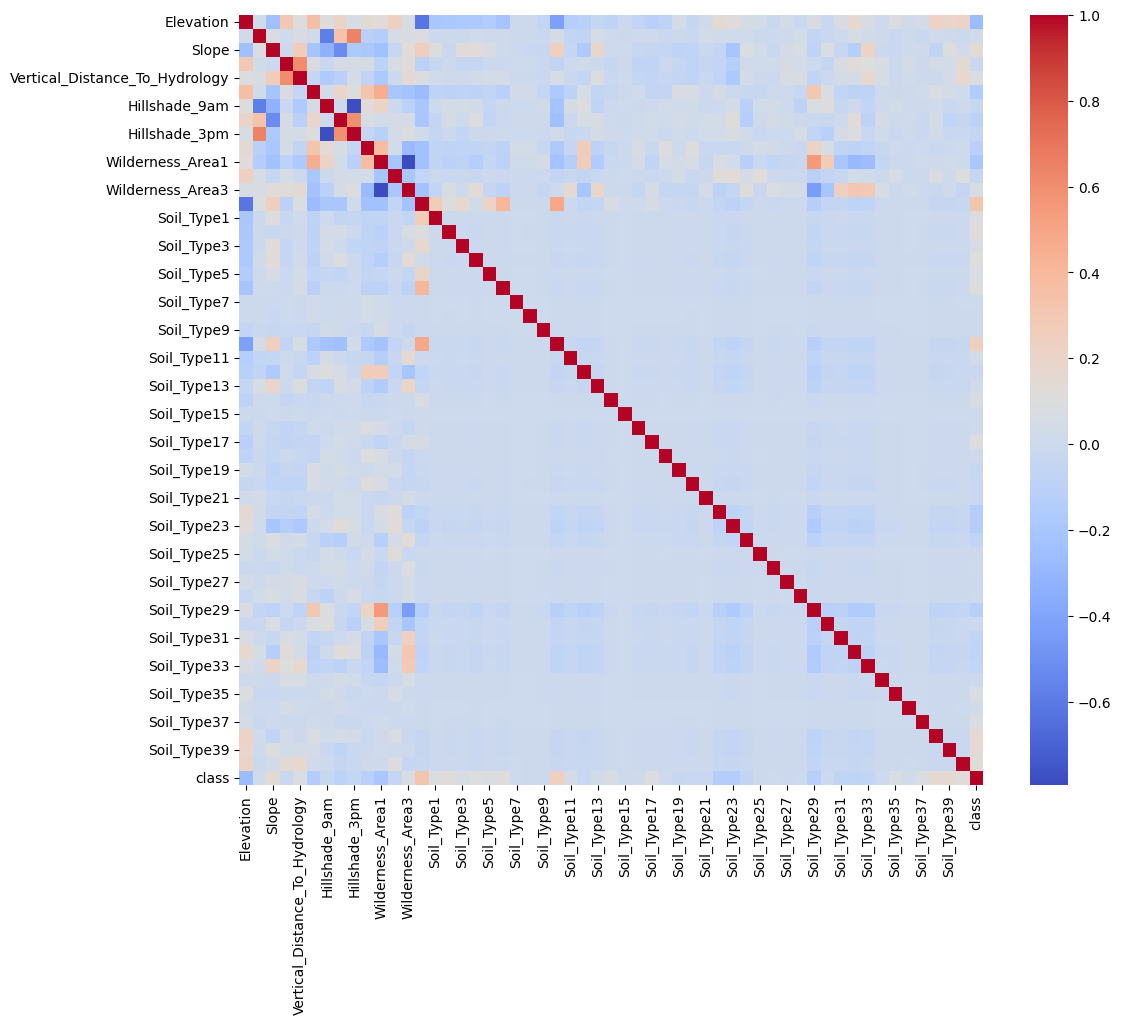

In [10]:
# determine the importance of the features
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix
corr_matrix = data.corr()

# Korrelation mit dem Zielwert
target_corr = corr_matrix['class'].sort_values()

# Heatmap für die Korrelationen (Beispiel)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


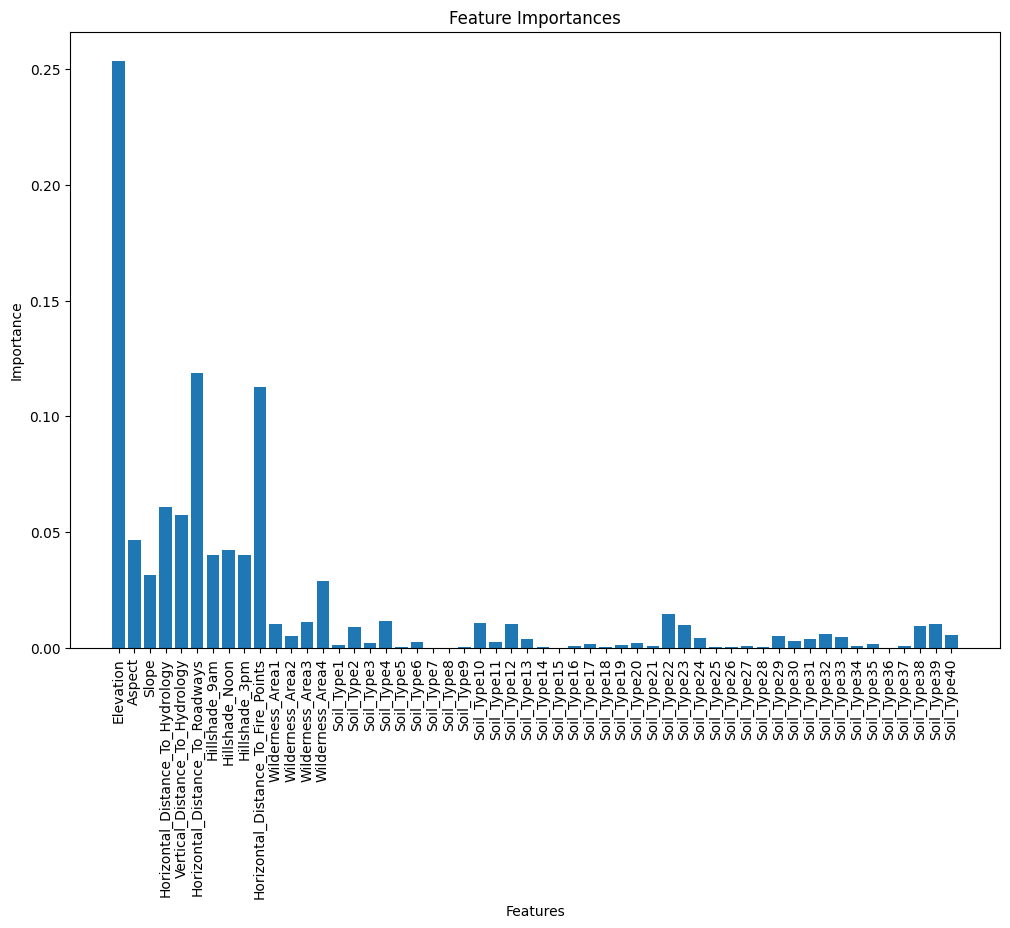

In [ ]:
"""from sklearn.ensemble import RandomForestClassifier

# Divide the data into features and labels
features = data.drop('class', axis=1)
labels = data['class']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the data
rf_classifier.fit(X_scaled, labels)

# Get the feature importances
feature_importances = rf_classifier.feature_importances_

# Visualize the feature importances
plt.figure(figsize=(12, 8))
plt.bar(features.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()"""

F1-Score: 0.9211943069591715
Average AUC: 0.9975629728005968


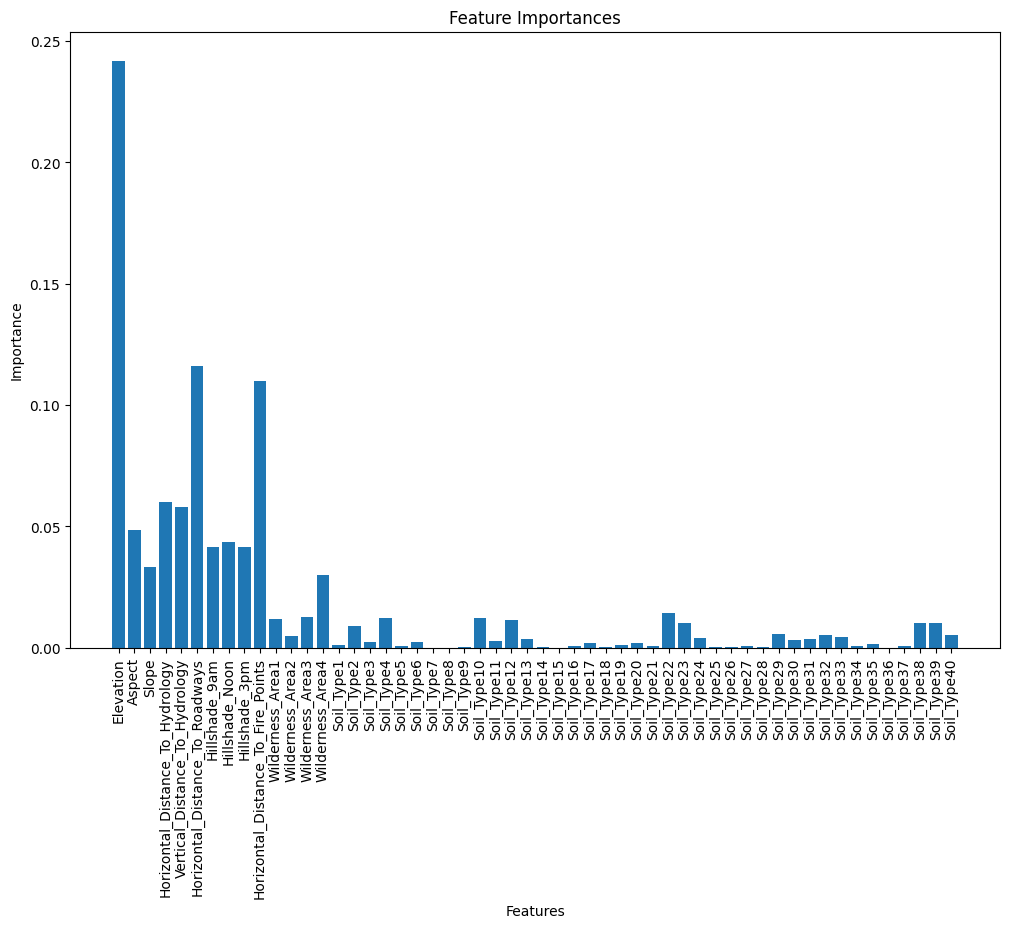

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
# import f1_score
from sklearn.metrics import f1_score, accuracy_score

# Divide the data into features and labels
features = data.drop('class', axis=1)
labels = data['class']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# Create and train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predictions and performance evaluation
predictions = rf_classifier.predict(X_test)
f1 = f1_score(y_test, predictions, average='macro')
print(f"F1-Score: {f1}")

# For multi-class AUC
y_bin = label_binarize(y_test, classes=np.unique(labels))
y_score = rf_classifier.predict_proba(X_test)
auc = roc_auc_score(y_bin, y_score, multi_class='ovr')
print(f"Average AUC: {auc}")

# Visualize the feature importances
feature_importances = rf_classifier.feature_importances_
plt.figure(figsize=(12, 8))
plt.bar(features.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

# Get the columns with feature importance below 0.005
low_importance_columns = features.columns[feature_importances < 0.005].tolist()

#low_importance_columns


In [12]:
# Vorhersagen für das Trainingsset
train_predictions = rf_classifier.predict(X_train)
train_probabilities = rf_classifier.predict_proba(X_train)

# Binarisieren der Labels für die OvR-AUC-Berechnung
y_train_bin = label_binarize(y_train, classes=np.unique(labels))
y_test_bin = label_binarize(y_test, classes=np.unique(labels))

# Berechnung der Metriken für das Trainingsset
train_f1 = f1_score(y_train, train_predictions, average='macro')
train_auc = roc_auc_score(y_train_bin, train_probabilities, multi_class='ovr')

# Ausgabe der Metriken für das Trainingsset
print(f"Trainingsset F1-Score: {train_f1}")
print(f"Trainingsset Durchschnittliche AUC: {train_auc}")

# Berechnung der Metriken für das Testset
test_predictions = rf_classifier.predict(X_test)
test_probabilities = rf_classifier.predict_proba(X_test)

test_f1 = f1_score(y_test, test_predictions, average='macro')
test_auc = roc_auc_score(y_test_bin, test_probabilities, multi_class='ovr')

# Ausgabe der Metriken für das Testset
print(f"Testset F1-Score: {test_f1}")
print(f"Testset Durchschnittliche AUC: {test_auc}")


Trainingsset F1-Score: 1.0
Trainingsset Durchschnittliche AUC: 1.0
Testset F1-Score: 0.9211943069591715
Testset Durchschnittliche AUC: 0.9975629728005968


In [13]:
# now we have a list of columns that might not impact the quality of the model if we remove them
# to have a baseline for comparison we have trained the random forest classifier previously
# now we will train the random forest classifier after removing the low importance columns

new_data = data.drop(low_importance_columns, axis=1)
new_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type10,Soil_Type12,Soil_Type22,Soil_Type23,Soil_Type29,Soil_Type32,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,1,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,1,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,1,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,1,0,0,0,0,5


In [14]:
# separate new_data into features and labels
new_features = new_data.drop('class', axis=1)
new_labels = new_data['class']

# Skalieren der reduzierten Features
scaler = MinMaxScaler()
X_scaled_reduced = scaler.fit_transform(new_features)

# Aufteilung des skalierten, reduzierten Datensatzes in Trainings- und Testdaten
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_scaled_reduced, labels, test_size=0.3, random_state=42)

# Neu-Training des Random Forest Classifiers mit dem skalierten, reduzierten Datensatz
rf_classifier_reduced = RandomForestClassifier()
rf_classifier_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier()

In [15]:
# Evaluate the new random forest classifier
new_predictions = rf_classifier_reduced.predict(X_test_reduced)
new_probabilities = rf_classifier_reduced.predict_proba(X_test_reduced)

new_f1 = f1_score(y_test, new_predictions, average='weighted')
new_auc = roc_auc_score(y_test_bin, new_probabilities, average='weighted')

new_f1, new_auc

(0.9529819309262937, 0.9952759519130578)

In [25]:
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1
print(len(y_train_adjusted), len(y_test_adjusted))

325366 174304


In [45]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reduced.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(np.unique(labels)), activation='softmax')
])

model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Training des Modells
history = model.fit(X_train_reduced, y_train_adjusted, validation_split=0.2, epochs=50, batch_size=32)
base_loss, base_accuracy = model.evaluate(X_test_reduced, y_test_adjusted)

c:\Users\marwi\anaconda3\envs\rl_env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6469 - loss: 0.8290 - val_accuracy: 0.7290 - val_loss: 0.6311
Epoch 2/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7158 - loss: 0.6689 - val_accuracy: 0.7322 - val_loss: 0.6171
Epoch 3/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7234 - loss: 0.6466 - val_accuracy: 0.7479 - val_loss: 0.5879
Epoch 4/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7285 - loss: 0.6358 - val_accuracy: 0.7471 - val_loss: 0.5770
Epoch 5/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7333 - loss: 0.6249 - val_accuracy: 0.7554 - val_loss: 0.5715
Epoch 6/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7326 - loss: 0.6239 - val_accuracy: 0.7554 - val_loss: 0.5650
Epoch 7/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7365 - loss: 0.6176 - val_accuracy: 0.7572 - val_loss: 0.5676
Epoch 8/50
10168/10168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 

In [46]:
# print accuracy and loss
print(f"Test accuracy: {base_accuracy}")
print(f"Test loss: {base_loss}")

Test accuracy: 0.7782724499702454
Test loss: 0.5181422233581543


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
import random

y_train_adjusted = y_train - np.min(y_train)
y_test_adjusted = y_test - np.min(y_test)

print(len(y_train_adjusted), len(y_test_adjusted))
print(X_train_reduced.shape[0], X_test_reduced.shape[0])


406708 174304
406708 174304


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# separate new_data into features and labels
new_features = new_data.drop('class', axis=1)
new_labels = new_data['class']

# Skalieren der reduzierten Features
scaler = MinMaxScaler()
X_scaled_reduced = scaler.fit_transform(new_features)

# Aufteilung des skalierten, reduzierten Datensatzes in Trainings- und Testdaten
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_scaled_reduced, new_labels, test_size=0.3, random_state=42)

# Labels anpassen
y_train_adjusted = y_train - np.min(y_train)
y_test_adjusted = y_test - np.min(y_test)

print(X_train_reduced.shape[0], len(y_train_adjusted))
print(X_test_reduced.shape[0], len(y_test_adjusted))

406708 406708
174304 174304


In [38]:

best_score = 0
best_params = {}

# Definieren der Anzahl der Iterationen für die Random Search
n_iter = 10

for _ in range(n_iter):
    # Zufällige Auswahl der Hyperparameter
    neurons = random.choice([16, 32, 64, 128])
    learning_rate = random.choice([0.001, 0.01, 0.1])
    batch_size = random.choice([16, 32, 64, 128])
    epochs = random.choice([10, 25, 50, 70, 100])

    # Modell erstellen
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train_reduced.shape[1],)),
        Dropout(0.5),
        Dense(neurons, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Modell trainieren
    history = model.fit(X_train_reduced, y_train_adjusted, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Modellleistung bewerten (hier: Validierungsgenauigkeit als Metrik)
    score = np.max(history.history['val_accuracy'])  # Maximalen Validierungsgenauigkeitswert wählen

    # Bessere Parameter speichern
    if score > best_score:
        best_score = score
        best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

# Ausgabe der besten Parameter und deren Genauigkeit
print(f"Best score: {best_score}")
print(f"Best params: {best_params}")

Best score: 0.7604312896728516
Best params: {'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 100}


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Set the hyperparameters from best_params
neurons = best_params['neurons']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']
epochs = best_params['epochs']

# Create the neural network model
model = Sequential()
model.add(Dense(neurons, activation='relu', input_shape=(X_train_reduced.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(neurons, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y_train_adjusted)), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reduced, y_train_adjusted, batch_size=batch_size, epochs=epochs, validation_data=(X_test_reduced, y_test_adjusted))


Epoch 1/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6791 - loss: 0.7557 - val_accuracy: 0.7427 - val_loss: 0.5979
Epoch 2/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7365 - loss: 0.6142 - val_accuracy: 0.7568 - val_loss: 0.5598
Epoch 3/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7472 - loss: 0.5859 - val_accuracy: 0.7677 - val_loss: 0.5360
Epoch 4/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7534 - loss: 0.5689 - val_accuracy: 0.7740 - val_loss: 0.5186
Epoch 5/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7563 - loss: 0.5587 - val_accuracy: 0.7768 - val_loss: 0.5125
Epoch 6/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7609 - loss: 0.5500 - val_accuracy: 0.7806 - val_loss: 0.5038
Epoch 7/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7631 - loss: 0.5457 - val_accuracy: 0.7852 - val_loss: 0.4920
Epoch 8/100
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - ac

In [41]:
model.save('optimized_model.keras')

In [42]:
from tensorflow.keras.models import load_model

modell = load_model('optimized_model.keras')

c:\Users\marwi\anaconda3\envs\rl_env\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [43]:
# test the model on the test data
loss, accuracy = model.evaluate(X_test_reduced, y_test_adjusted)
print(f"Test accuracy: {accuracy}")
print(f"Test loss: {loss}")

5447/5447 ━━━━━━━━━━━━━━━━━━━━ 5s 997us/step - accuracy: 0.8292 - loss: 0.4056
Test accuracy: 0.8271353244781494
Test loss: 0.4078749120235443


5447/5447 ━━━━━━━━━━━━━━━━━━━━ 5s 932us/step


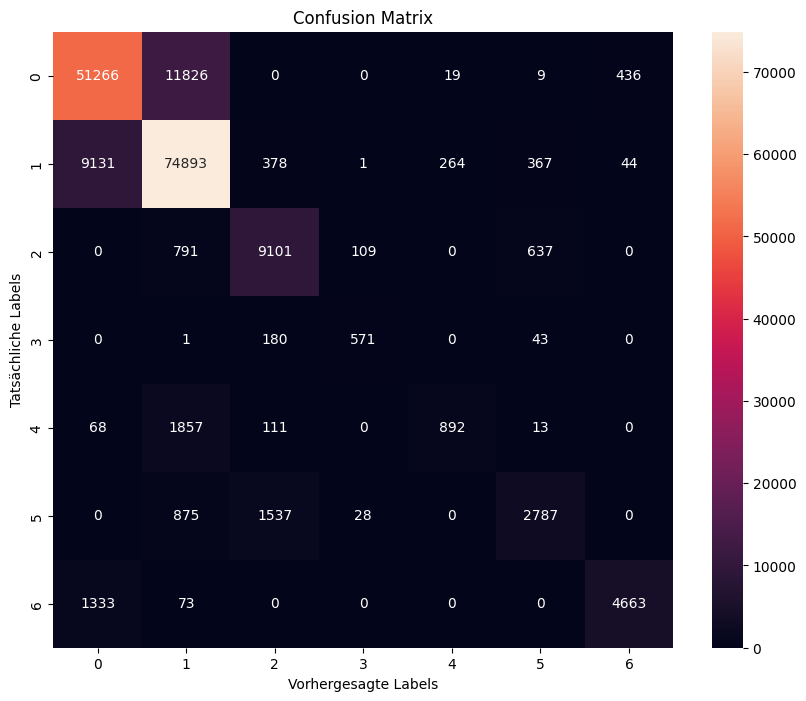

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     63556
           1       0.83      0.88      0.85     85078
           2       0.80      0.86      0.83     10638
           3       0.81      0.72      0.76       795
           4       0.76      0.30      0.43      2941
           5       0.72      0.53      0.61      5227
           6       0.91      0.77      0.83      6069

    accuracy                           0.83    174304
   macro avg       0.81      0.70      0.73    174304
weighted avg       0.83      0.83      0.82    174304



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Vorhersagen auf dem Testdatensatz
y_pred = modell.predict(X_test_reduced)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Tatsächliche Labels')
plt.xlabel('Vorhergesagte Labels')
plt.show()

# Klassifikationsbericht
print(classification_report(y_test_adjusted, y_pred_classes))

In [49]:
print(conf_matrix)

[[51266 11826     0     0    19     9   436]
 [ 9131 74893   378     1   264   367    44]
 [    0   791  9101   109     0   637     0]
 [    0     1   180   571     0    43     0]
 [   68  1857   111     0   892    13     0]
 [    0   875  1537    28     0  2787     0]
 [ 1333    73     0     0     0     0  4663]]



The confusion matrix shows how well the model predicts different classes. Diagonal elements (e.g., 51266, 74893, 9101) represent correct predictions for each class, indicating the model's accuracy in classifying those classes. Non-diagonal elements indicate misclassifications, like 11826 instances of the first class being wrongly predicted as the second class. High diagonal values for classes 1, 2, and 7 suggest good model performance on these, while lower diagonal values for classes 4 and 6 hint at difficulties in predicting these classes correctly. In theory I could continue fine-tuning this model, for examply by adding weights to classes that the model struggled with, or by using an entirely different algorithm. I might come back to this project later and continue to improve it.